## Skoltech
## Intro to data science, fall 2020
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/1zwUO1KZNDTZYuD12dyMO3CaErGHnZuHx1Mdbo-c11ME/

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q5) do not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=29

#### Import basic libraries

In [220]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Dataset
For the task we'll use kickstarter dataset. Kickstarter is the crowdfounding platform, where people can announce their project with financial goals and other can support the projects by paying the money ("pledging"). The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal. Let's take a brief look to the dataset.

In [221]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)

In [222]:
# df.sample(5)

In [223]:
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00


In [224]:
df.shape

(378661, 14)

In [225]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

# Section 1. Dataset acquaintance

-----

### Q1.1

#### How many NaN values are there in the dataset?

In [226]:
df.isnull().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [227]:
print('ANSW =', 3797+4)

ANSW = 3801


In [228]:
df = df.dropna()
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00


In [229]:
378661 - 374860 

3801

----

Let us simplify the task a little bit: we are aiming to predict either project fails or not.
Thus 'success' projects will be encoded as 1, with state ['failed', 'canceled'] as 0 and we remove the rows with any other state.

### Q1.2 
#### How many '1' values are in resulting dataset (in state column)?

In [230]:
df = df.replace({'state' : { 'successful' : 1, 'failed' : 0, 'canceled' : 0 }})
df = df[~df['state'].isin(['undefined', 'live', 'suspended'])]
df.state = df.state.astype(int)

In [231]:
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,0,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,0,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,0,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,0,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,0,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,0,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,0,58,US,8233.00,8233.00,125000.00


In [232]:
df.shape

(370219, 14)

In [233]:
374860 - 370219

4641

In [234]:
df[df.state == 1]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1205.00,1205.00,1000.00
100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,1,100,US,12700.00,12700.00,12500.00
1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,1,761,GB,57763.78,121857.33,6469.73
1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,1,7,US,250.00,250.00,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999929142,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Tabletop Games,Games,EUR,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,1,35,FR,66.72,1452.47,1165.70
999934908,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,1,120,US,6169.00,6169.00,3500.00
999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,1,31,US,1732.02,1732.02,950.00


ANSW: 133851

------

### Q1.3
#### Whats is a name of a project attracted the biggest pay check? (on average). Use column usd_pledged_real to judge. If there are multiple projects, choose any single one.

In [235]:
# np.max(df.usd_pledged_real[df.backers == 0])

In [236]:
# df.backers = df.backers.replace(0,1)

In [237]:
df.head(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00


In [238]:
df.shape

(370219, 14)

In [239]:
# np.max(df.usd_pledged_real[df.backers == 1])

In [240]:
a_1_3 = df.usd_pledged_real / df.backers
a_1_3 = a_1_3.replace(np.inf, np.NaN)

In [241]:
a_1_3

ID
1000002330           NaN
1000003930    161.400000
1000004038     73.333333
1000007540      1.000000
1000011046     91.642857
                 ...    
999976400      25.000000
999977640      31.000000
999986353      20.000000
999987933      33.333333
999988282      30.823529
Length: 370219, dtype: float64

In [242]:
a_1_3.shape

(370219,)

In [243]:
df['av_check'] = a_1_3

In [244]:
df['av_check'].shape

(370219,)

In [245]:
df['av_check'].sort_values(ascending=False)

ID
1459482568    10000.0
2024799289    10000.0
1767293256    10000.0
642968820     10000.0
472233286     10000.0
               ...   
99984851          NaN
99991751          NaN
999931480         NaN
99996661          NaN
999976312         NaN
Name: av_check, Length: 370219, dtype: float64

In [246]:
df.name[df['av_check'] == df['av_check'].max()].values[:]

array(['Patented (9 seasons) food enhancer', 'KIRISUTOS PACHYDERM',
       '21st CENTURY MEDICAL PRACTICE SYSTEM THAT CHANGES THE WORLD',
       'The Commoner Princess',
       '"SUNBURN" - starring Michael Madsen, indie action film',
       'Hollow Earth Project, Journey to the center of the Earth,',
       'Nobody: The Movie (Canceled)',
       'Post Traumatic Stress (PTSD) Affects Us All',
       'The Hare On The Chair - An Easter Legend'], dtype=object)

'Patented (9 seasons) food enhancer', 'KIRISUTOS PACHYDERM',
       '21st CENTURY MEDICAL PRACTICE SYSTEM THAT CHANGES THE WORLD',
       'The Commoner Princess',
       '"SUNBURN" - starring Michael Madsen, indie action film',
       'Hollow Earth Project, Journey to the center of the Earth,',
       'Nobody: The Movie (Canceled)',
       'Post Traumatic Stress (PTSD) Affects Us All',
       'The Hare On The Chair - An Easter Legend'

-----

### Q1.4
#### What is the most successful main category (in terms of success percentage)?

In [247]:
success = df.groupby('main_category')['state'].sum()
df['success'] = df['main_category'].map(success)
projects = df.groupby('main_category')['state'].count()
df['projects'] = df['main_category'].map(projects)

In [248]:
success

main_category
Art             11510
Comics           5842
Crafts           2115
Dance            2338
Design          10549
Fashion          5593
Film & Video    23612
Food             6085
Games           12518
Journalism       1012
Music           24105
Photography      3305
Publishing      12300
Technology       6433
Theater          6534
Name: state, dtype: int64

In [249]:
df['percent_success'] = df['success'] /df['projects']
df.main_category[df['percent_success'] == df['percent_success'].max()].unique()

array(['Dance'], dtype=object)

In [250]:
df = df.drop(['success', 'projects', 'percent_success'], axis = 1)

ANSW: Dance

-----

### Q1.5
#### Define the category with highest goal per project. How many projects belong to it?  (note: we use category here, not main_category)

In [251]:
mean_goal = df.groupby('category')['goal'].mean()

In [252]:
df['mean_goal'] = df['category'].map(mean_goal)

In [253]:
df[df['mean_goal'] == df['mean_goal'].max()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,av_check,mean_goal
ID,,,,,,,,,,,,,,,,
1001994928,Screening of Mr Turner,Movie Theaters,Film & Video,GBP,2015-03-15,175.0,2015-01-31 11:38:54,41.00,0,5,GB,61.79,60.90,259.93,12.180000,1.594601e+06
1005863674,MY VERY FIRST KICKSTARTER,Movie Theaters,Film & Video,USD,2014-08-12,6500.0,2014-07-13 20:08:35,27.00,0,2,US,27.00,27.00,6500.00,13.500000,1.594601e+06
1008175271,Help Us Reopen the Osio Cinemas,Movie Theaters,Film & Video,USD,2015-09-03,70000.0,2015-07-27 07:54:54,76048.46,1,621,US,76048.46,76048.46,70000.00,122.461288,1.594601e+06
1023317079,Darkside Cinema Digital Conversion is underway!,Movie Theaters,Film & Video,USD,2014-07-13,45000.0,2014-06-13 05:39:57,56730.53,1,739,US,56730.53,56730.53,45000.00,76.766617,1.594601e+06
1034625299,Taking on the NFL: The National Martial Arts L...,Movie Theaters,Film & Video,USD,2016-10-01,50000.0,2016-09-01 00:45:27,300.00,0,4,US,0.00,300.00,50000.00,75.000000,1.594601e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759083,Who Shot the Sheriff?,Movie Theaters,Film & Video,USD,2015-11-10,10000000.0,2015-09-15 04:20:20,55.00,0,1,US,55.00,55.00,10000000.00,55.000000,1.594601e+06
978471074,Black Ice - How blacks enslaved invented the g...,Movie Theaters,Film & Video,USD,2016-05-01,375000.0,2016-03-30 21:25:33,126.00,0,4,US,126.00,126.00,375000.00,31.500000,1.594601e+06
982744264,Infinity Outdoor Cinema,Movie Theaters,Film & Video,USD,2015-09-16,50000.0,2015-08-17 09:27:55,1125.00,0,4,US,1125.00,1125.00,50000.00,281.250000,1.594601e+06


ANSW: 227

-----

### Q1.6
#### What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

In [254]:
df.groupby('category')['usd_pledged_real'].max().sort_values(ascending=False)

category
Product Design     20338986.27
Tabletop Games     12393139.69
Gaming Hardware     8596474.58
Video Games         6333295.77
Sound               6225354.98
                      ...     
Printing              25150.30
Embroidery            18026.73
Taxidermy             15748.62
Residencies           15567.50
Crochet                7447.00
Name: usd_pledged_real, Length: 159, dtype: float64

ANSW: Product Design

------

As one can notice, there are both numerical and object-type data in our dataframe. 

We suggest you to split them to perform EDA separately. 

### Q1.7
#### Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [255]:
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                 int64
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
av_check            float64
mean_goal           float64
dtype: object

In [256]:
num_features = ['goal', 'pledged', 'state', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'av_check']
obj_features = ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'country']

ANSW: 7

### Q1.8
#### Let's do a bit of feature engineering. Let's create column 'pledge2goal' which define as ratio of usd_pledged_real to goal. How many outliers are there?
#### (We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [257]:
df['pledge2goal'] = df['usd_pledged_real']/df['goal']

In [258]:
df['pledge2goal']

ID
1000002330    0.000000
1000003930    0.080700
1000004038    0.004889
1000007540    0.000200
1000011046    0.065795
                ...   
999976400     0.000500
999977640     0.103333
999986353     0.001333
999987933     0.013333
999988282     0.262000
Name: pledge2goal, Length: 370219, dtype: float64

In [259]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,av_check,mean_goal,pledge2goal
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,NaN,5342.947947,0.000000
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,161.400000,65952.593315,0.080700
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,73.333333,65952.593315,0.004889
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,1.000000,24207.402460,0.000200
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,91.642857,88904.104145,0.065795


In [260]:
df.shape

(370219, 17)

In [261]:
q_low = df['pledge2goal'].quantile(0.25)
q_hi  = df['pledge2goal'].quantile(0.75)
iqr = q_hi - q_low

q_low = q_low - 1.5*iqr
q_hi = q_hi + 1.5*iqr

In [262]:
df_filtered = df[(df['pledge2goal'] >= q_low) & (df['pledge2goal'] <= q_hi)]
df_filtered.shape

(351804, 17)

In [263]:
print('ANSW:', df.shape[0] - df_filtered.shape[0])

ANSW: 18415


ANSW: 18415

### Q1.9
#### Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the ratio matters.
- B. Distributions have almost no intersection, the bigger ratio, the bigger success.
- C. Distributions intersect significantly, the bigger ratio, the bigger success
- D. Distributions have almost no intersection, the less ratio, the bigger success.

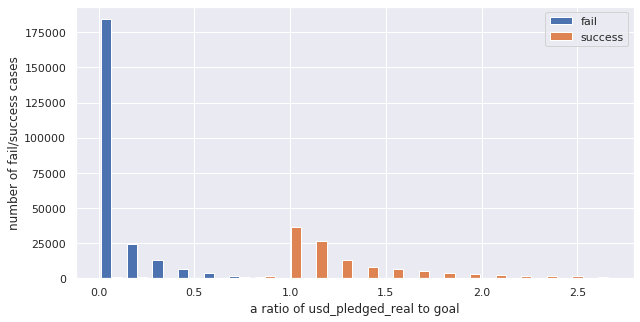

In [264]:
fail = df_filtered['pledge2goal'][df_filtered.state == 0]
success = df_filtered['pledge2goal'][df_filtered.state == 1]

plt.figure(figsize=(10,5))
plt.hist([fail, success], bins = 20, label = ['fail', 'success'])
plt.legend()
plt.ylabel('number of fail/success cases')
plt.xlabel('a ratio of usd_pledged_real to goal')
plt.show()

ANSW: B

-----

### Q1.10
#### Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer

([array([1.84148e+05, 2.44030e+04, 1.28190e+04, 6.92300e+03, 3.84700e+03,
         1.98800e+03, 1.04500e+03, 4.51000e+02, 2.03000e+02, 1.23000e+02,
         7.60000e+01, 4.60000e+01, 2.80000e+01, 1.90000e+01, 3.10000e+01,
         1.30000e+01, 2.20000e+01, 1.00000e+01, 1.40000e+01, 9.00000e+00]),
  array([  642.,   639.,   135.,    67.,    52.,  1027.,  1717., 36825.,
         26537., 12817.,  8114.,  6568.,  5360.,  3838.,  2813.,  2383.,
          1888.,  1619.,  1310.,  1235.])],
 array([0.      , 0.133725, 0.26745 , 0.401175, 0.5349  , 0.668625,
        0.80235 , 0.936075, 1.0698  , 1.203525, 1.33725 , 1.470975,
        1.6047  , 1.738425, 1.87215 , 2.005875, 2.1396  , 2.273325,
        2.40705 , 2.540775, 2.6745  ]),
 <a list of 2 Lists of Patches objects>)

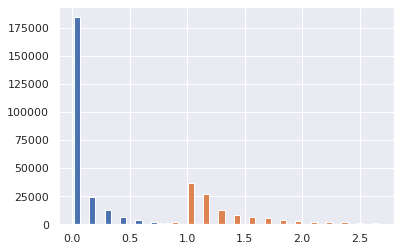

In [265]:
counts = plt.hist([fail, success], bins = 20, label = ['fail', 'success'])
counts

ANSW: [0.0, 1.0]

### Q1.11
#### Compute Pearson correlation coefficient between the pledge2real and target variable.

In [266]:
scipy.stats.pearsonr(df_filtered.pledge2goal, df_filtered.state)

(0.9021138733999503, 0.0)

-----

### Q1.12
#### Visualize dependancy of numerical data with success. What can you say about it?

In [267]:
df_filtered.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,av_check,mean_goal,pledge2goal
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,NaN,5342.947947,0.000000
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,161.400000,65952.593315,0.080700
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,73.333333,65952.593315,0.004889
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,1.000000,24207.402460,0.000200
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,91.642857,88904.104145,0.065795


In [268]:
num_features = ['goal', 'pledged', 'state', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'pledge2goal']

In [269]:
df_filtered[[*num_features]]

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal
ID,,,,,,,,
1000002330,1000.0,0.0,0,0,0.0,0.0,1533.95,0.000000
1000003930,30000.0,2421.0,0,15,100.0,2421.0,30000.00,0.080700
1000004038,45000.0,220.0,0,3,220.0,220.0,45000.00,0.004889
1000007540,5000.0,1.0,0,1,1.0,1.0,5000.00,0.000200
1000011046,19500.0,1283.0,0,14,1283.0,1283.0,19500.00,0.065795
...,...,...,...,...,...,...,...,...
999976400,50000.0,25.0,0,1,25.0,25.0,50000.00,0.000500
999977640,1500.0,155.0,0,5,155.0,155.0,1500.00,0.103333
999986353,15000.0,20.0,0,1,20.0,20.0,15000.00,0.001333


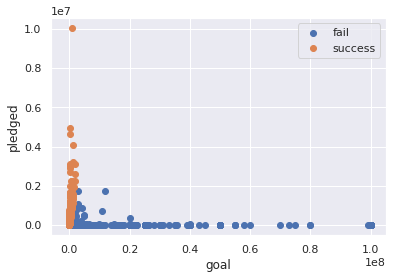

In [270]:
plt.scatter(df_filtered.goal[df_filtered.state == 0], df_filtered.pledged[df_filtered.state == 0], label='fail')
plt.scatter(df_filtered.goal[df_filtered.state == 1], df_filtered.pledged[df_filtered.state == 1], label='success')
plt.legend()
plt.xlabel('goal')
plt.ylabel('pledged')
plt.show()

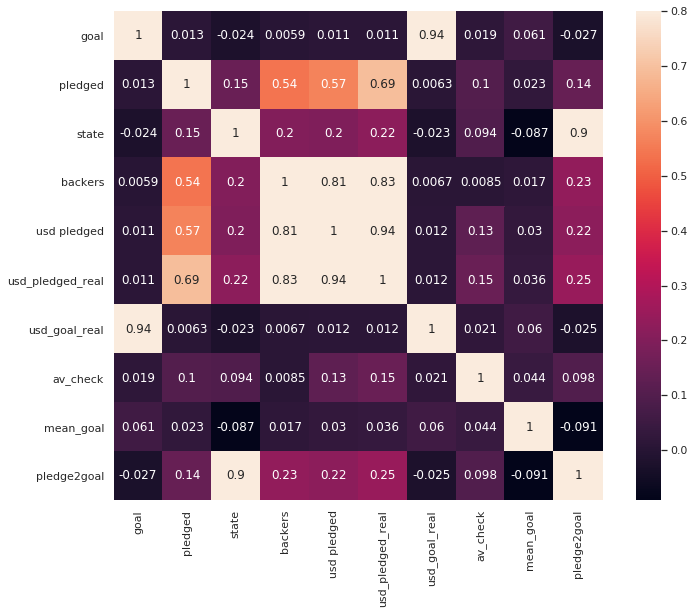

In [271]:
#correlation matrix

corrmat = df_filtered.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot = True, vmax=.8, square=True)

According to the dependancy matrix, we can say that the state result hightly depends on pledge2goal column - which is understandable as pledge2goal is the ration between what the project got at the end with what project needed at the begging.

# Feature generation
Lets' generate some more feature that could be useful

### Q2.1 Create a year column that would hold the year. How many projects were in year 2012?

In [272]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)
df = df.dropna()
df = df.replace({'state' : { 'successful' : 1, 'failed' : 0, 'canceled' : 0 }})
df = df[~df['state'].isin(['undefined', 'live', 'suspended'])]
df.state = df.state.astype(int)

In [273]:
date_launched = pd.to_datetime(df['launched'])
df['year'] = date_launched.dt.year
df[df['year'] == 2012]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year
ID,,,,,,,,,,,,,,,
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,0,1,US,1.00,1.00,5000.0,2012
1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,1,7,US,250.00,250.00,250.0,2012
1000071625,Boco Tea,Food,Food,USD,2012-06-02,5000.0,2012-05-03 17:24:32,1781.00,0,40,US,1781.00,1781.00,5000.0,2012
1000131947,Arrows & Sound Debut Album,Indie Rock,Music,USD,2012-05-19,4000.0,2012-04-19 01:04:31,8641.34,1,157,US,8641.34,8641.34,4000.0,2012
1000146991,Help Scott Reynolds Make a New Record!,Indie Rock,Music,USD,2012-09-02,15000.0,2012-08-03 18:43:16,17499.99,1,277,US,17499.99,17499.99,15000.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999762532,Traverse City Dance Project 2012,Dance,Dance,USD,2012-05-18,7000.0,2012-04-08 22:49:06,7120.00,1,75,US,7120.00,7120.00,7000.0,2012
999778598,"Michael & Jeanne ""Peace and Sunshine""",Indie Rock,Music,USD,2012-07-10,12500.0,2012-06-10 19:35:15,15.00,0,1,US,15.00,15.00,12500.0,2012
999799441,The Hollywood Kills On Tour,Rock,Music,USD,2012-05-04,10000.0,2012-03-05 23:12:03,10300.00,1,78,US,10300.00,10300.00,10000.0,2012


In [274]:
df.shape

(370219, 15)

ANSW: 41109

### Q2.2 Make a column 'duration_days' with number of full days from launch to deadline.
What is median value for this column?

In [275]:
date_deadline = pd.to_datetime(df['deadline'])
duration = date_deadline - date_launched

In [276]:
df['duration_days'] = duration.dt.days
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,2015,58
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,2017,59
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,2013,44
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,2012,29
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,2015,55


In [277]:
print('ANSW', df['duration_days'].median())

ANSW 29.0


ANSW 29.0

### Q2.3 Delete mistaken value from column 'country'. What is the value?

In [278]:
df['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG', 'JP'],
      dtype=object)

### Q2.4 Make column 'region' out of column country (america, europe, asia, oceania(including australiza/nz))
Where is the region with the worst conversion rate (percentage of successful projects)

In [279]:
myDict = {}
myDict['Europe'] = ['GB', 'NO', 'IT', 'DE', 'IE', 'ES', 'SE', 'FR', 'NL', 'CH', 'AT','BE', 'DK', 'LU']
myDict['America'] = ['US', 'CA', 'MX'] 
myDict['Asia'] = ['HK', 'SG', 'JP']
myDict['Oceania'] = ['AU', 'NZ']
myDict

{'Europe': ['GB',
  'NO',
  'IT',
  'DE',
  'IE',
  'ES',
  'SE',
  'FR',
  'NL',
  'CH',
  'AT',
  'BE',
  'DK',
  'LU'],
 'America': ['US', 'CA', 'MX'],
 'Asia': ['HK', 'SG', 'JP'],
 'Oceania': ['AU', 'NZ']}

In [280]:
inv_dict = {}
for k,v in myDict.items():
    for x in v:
        inv_dict.setdefault(x,[]).append(k)

In [281]:
inv_dict

{'GB': ['Europe'],
 'NO': ['Europe'],
 'IT': ['Europe'],
 'DE': ['Europe'],
 'IE': ['Europe'],
 'ES': ['Europe'],
 'SE': ['Europe'],
 'FR': ['Europe'],
 'NL': ['Europe'],
 'CH': ['Europe'],
 'AT': ['Europe'],
 'BE': ['Europe'],
 'DK': ['Europe'],
 'LU': ['Europe'],
 'US': ['America'],
 'CA': ['America'],
 'MX': ['America'],
 'HK': ['Asia'],
 'SG': ['Asia'],
 'JP': ['Asia'],
 'AU': ['Oceania'],
 'NZ': ['Oceania']}

In [282]:
df['region'] = df['country'].map(inv_dict)

In [283]:
def foo (a):
    return a[0]

In [284]:
df['region'] = df['region'].apply(foo)

In [285]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days,region
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,2015,58,Europe
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,2017,59,America
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,2013,44,America
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,2012,29,America
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,2015,55,America


In [286]:
success = df.groupby('region')['state'].sum()
df['success'] = df['region'].map(success)
projects = df.groupby('region')['state'].count()
df['projects'] = df['region'].map(projects)

In [287]:
df['percent_success'] = df['success'] /df['projects']
df.region[df['percent_success'] == df['percent_success'].min()].unique()

array(['Oceania'], dtype=object)

ANSW: Oceania

In [288]:
df = df.drop(['success', 'projects', 'percent_success'], axis = 1)

### Q2.5 For each main_category leave only the three most popular category and replace other with "other"
What is the most frequent subcategory for design?

In [289]:
main_category = df['main_category'].unique()
main_category

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [290]:
a_2_5 = df['category'][df['main_category'] == main_category[3]].value_counts()
a_2_5

Food                 11395
Restaurants           2775
Drinks                2367
Small Batch           1778
Food Trucks           1726
Farms                 1138
Events                 635
Vegan                  575
Cookbooks              529
Spaces                 423
Farmer's Markets       418
Community Gardens      296
Bacon                  208
Name: category, dtype: int64

In [291]:
df['main_category'][df['category'] == 'Spaces']

ID
1001578248       Food
1003533888       Food
1005580823      Dance
1008454668    Theater
1011575016      Dance
               ...   
995430691        Food
995638690        Food
996645454        Food
999191096       Dance
999477658        Food
Name: main_category, Length: 830, dtype: object

ANSW: Product Design

In [292]:
save = a_2_5[3:]
list_others = save.index.to_list()
list_others

['Small Batch',
 'Food Trucks',
 'Farms',
 'Events',
 'Vegan',
 'Cookbooks',
 'Spaces',
 "Farmer's Markets",
 'Community Gardens',
 'Bacon']

In [293]:
df_test = df.replace({'category' : { list_others[0]: 'other' }})
df_test[df_test['category'] == 'other'].head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days,region
ID,,,,,,,,,,,,,,,,,
1002295749,Help Momma Root's Bake Shop Make The Big Move!,other,Food,USD,2017-06-30,5500.0,2017-05-31 03:06:33,275.0,0,2,US,0.00,275.00,5500.00,2017,29,America
1004226383,Parthia Saffron - To your door one thread @ a ...,other,Food,CAD,2014-08-07,4000.0,2014-07-16 20:30:32,115.0,0,6,CA,107.21,105.35,3664.35,2014,21,America
1004269025,"Mango, Pineapple & Habanero Toe Curling HOT La...",other,Food,USD,2017-02-02,3000.0,2016-12-19 17:43:54,635.0,0,30,US,54.00,635.00,3000.00,2016,44,America
1004513718,Give in to Sweet Surrender,other,Food,USD,2015-02-18,5000.0,2015-01-19 02:28:05,100.0,0,1,US,100.00,100.00,5000.00,2015,29,America
1007664002,100% pure chicken breast jerky treats PETS,other,Food,USD,2015-09-26,6500.0,2015-08-27 02:24:20,47.0,0,3,US,47.00,47.00,6500.00,2015,29,America


In [294]:
list_others

['Small Batch',
 'Food Trucks',
 'Farms',
 'Events',
 'Vegan',
 'Cookbooks',
 'Spaces',
 "Farmer's Markets",
 'Community Gardens',
 'Bacon']

In [295]:
for i in range(0, len(main_category)):
    a_2_5 = df['category'][df['main_category'] == main_category[i]].value_counts()
    save = a_2_5[3:]
    list_others = save.index.to_list()
    for j in range(0, len(list_others)):
        df.loc[((df.main_category == main_category[i])  & (df.category == list_others[j])), 'category'] = 'other'
#         df[].replace({'category': {list_others[j]: 'other'}}, inplace=True)

In [296]:
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days,region
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,2015,58,Europe
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,2017,59,America
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,2013,44,America
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,2012,29,America
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,2015,55,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,25.0,25.0,50000.00,2014,29,America
999977640,The Tribe,other,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,155.0,155.0,1500.00,2011,26,America
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,other,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,20.0,20.0,15000.00,2010,45,America


In [297]:
df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [298]:
df['category'][df['main_category'] == main_category[13]].value_counts()

Dance           2314
Performances    1000
other            227
Spaces           195
Name: category, dtype: int64

### Q2.6 create the columns "name_length" with length of the name.
What is the biggets length?

In [299]:
df['name_length'] = df['name'].str.len()

In [300]:
print('ANSW:',df['name_length'].max())

ANSW: 96


In [301]:
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,duration_days,region,name_length
ID,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,0,0,GB,0.00,0.00,1533.95,2015,58,Europe,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,0,15,US,100.00,2421.00,30000.00,2017,59,America,45
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,0,3,US,220.00,220.00,45000.00,2013,44,America,14
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,0,1,US,1.00,1.00,5000.00,2012,29,America,49
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,0,14,US,1283.00,1283.00,19500.00,2015,55,America,58
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,52375.00,52375.00,50000.00,2016,34,America,20
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1205.00,1205.00,1000.00,2014,19,America,60
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,0,40,US,453.00,453.00,25000.00,2016,44,America,49
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,0,58,US,8233.00,8233.00,125000.00,2014,34,America,53


In [302]:
df_xgboost = df.copy()

# Preprocessing

### Q3.1 Drop the leaking columns
Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them


ANSW: the colomn with pledged money, because we don't know this info when we are predicting if the project will be successfull, i.e. would it achieve the funding goal or not.

In [303]:
df.drop('pledged', axis=1, inplace=True)
df.drop('usd pledged', axis=1, inplace=True)
df.drop('usd_pledged_real', axis=1, inplace=True)
df.drop('backers', axis=1, inplace=True)

In [304]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real,year,duration_days,region,name_length
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0,GB,1533.95,2015,58,Europe,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,0,US,30000.00,2017,59,America,45
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,0,US,45000.00,2013,44,America,14
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,0,US,5000.00,2012,29,America,49
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,0,US,19500.00,2015,55,America,58


### Q3.2 Deal with the categorical features.
Lets drop some more columns for now (name, deadline, launched, country, usd_goal_real). Note: you can re-use these columns in the Q5 section. 
Preprocess the rest of categorical columns. How many columns do you have now?

In [305]:
df.drop('name', axis=1, inplace=True)
df.drop('deadline', axis=1, inplace=True)
df.drop('launched', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)
df.drop('usd_goal_real', axis=1, inplace=True)

In [306]:
df.head()

,category,main_category,currency,goal,state,year,duration_days,region,name_length
ID,,,,,,,,,
1000002330,other,Publishing,GBP,1000.0,0,2015,58,Europe,31
1000003930,other,Film & Video,USD,30000.0,0,2017,59,America,45
1000004038,other,Film & Video,USD,45000.0,0,2013,44,America,14
1000007540,Music,Music,USD,5000.0,0,2012,29,America,49
1000011046,Film & Video,Film & Video,USD,19500.0,0,2015,55,America,58


In [307]:
df.index

Int64Index([1000002330, 1000003930, 1000004038, 1000007540, 1000011046,
            1000014025, 1000023410, 1000030581, 1000034518,  100004195,
            ...
             999969812,  999971898,  999972264,  999975836,  999976312,
             999976400,  999977640,  999986353,  999987933,  999988282],
           dtype='int64', name='ID', length=370219)

In [308]:
obj_features = ['category', 'main_category', 'currency', 'region']

In [309]:
from sklearn.preprocessing import OneHotEncoder

In [310]:
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(df[['category', 'main_category', 'currency', 'region']]))

In [311]:
ohe.categories_

[array(['Accessories', 'Apparel', 'Apps', 'Art', "Children's Books",
        'Comic Books', 'Comics', 'Crafts', 'DIY', 'Dance', 'Design',
        'Documentary', 'Drinks', 'Fashion', 'Fiction', 'Film & Video',
        'Food', 'Games', 'Graphic Design', 'Graphic Novels',
        'Illustration', 'Indie Rock', 'Journalism', 'Music', 'Musical',
        'Nonfiction', 'Painting', 'People', 'Performances', 'Photobooks',
        'Photography', 'Plays', 'Print', 'Product Design', 'Restaurants',
        'Rock', 'Shorts', 'Spaces', 'Tabletop Games', 'Technology',
        'Theater', 'Video Games', 'Web', 'Woodworking', 'other'],
       dtype=object),
 array(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
        'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
        'Photography', 'Publishing', 'Technology', 'Theater'], dtype=object),
 array(['AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN',
        'NOK', 'NZD', 'SEK', 'SGD', 'USD'], dtype=object),
 array(['America'

In [312]:
category_cols = [f'category_{cat}' for cat in ohe.categories_[0]]
main_category_cols = [f'main_category_{cat}' for cat in ohe.categories_[1]]
currency_cols = [f'currency_{cat}' for cat in ohe.categories_[2]]
region_cols = [f'region_{cat}' for cat in ohe.categories_[3]]

In [313]:
dummy_cols_names = [*category_cols, *main_category_cols, *currency_cols, *region_cols]
encoded_features.columns = dummy_cols_names
encoded_features.index = df.index

In [314]:
encoded_features

,category_Accessories,category_Apparel,category_Apps,category_Art,category_Children's Books,category_Comic Books,category_Comics,category_Crafts,category_DIY,category_Dance,...,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,region_America,region_Asia,region_Europe,region_Oceania
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1000003930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1000004038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1000007540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1000011046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
999977640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
999986353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [315]:
df.drop(['category', 'main_category', 'currency', 'region'], axis=1, inplace=True)

In [316]:
df = pd.concat([df, encoded_features], axis=1)

In [317]:
df

,goal,state,year,duration_days,name_length,category_Accessories,category_Apparel,category_Apps,category_Art,category_Children's Books,...,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,region_America,region_Asia,region_Europe,region_Oceania
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,1000.0,0,2015,58,31,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1000003930,30000.0,0,2017,59,45,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1000004038,45000.0,0,2013,44,14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1000007540,5000.0,0,2012,29,49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1000011046,19500.0,0,2015,55,58,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,50000.0,0,2014,29,49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
999977640,1500.0,0,2011,26,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
999986353,15000.0,0,2010,45,71,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


ANSW: 83

### Q3.3 Split the dataset
Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
num_feat = ['goal', 'year', 'duration_days', 'name_length']

In [320]:
X = df[[*num_feat, *category_cols, *main_category_cols, *currency_cols, *region_cols]]
y = df['state']

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_test.shape

((296175, 82), (74044,))

In [322]:
y_train[df['state'] == 1]

ID
237982137     1
1284059531    1
1782072202    1
2080222059    1
843411852     1
             ..
1454497021    1
1285297507    1
2083675670    1
1572652890    1
1763197930    1
Name: state, Length: 107134, dtype: int64

ANSW: 107134

### Q3.4 Scale the numeric columns with standard scaler
What is max number in goal field after scaling?

In [323]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [324]:
scaler.fit(X_train[num_feat])

X_train[num_feat] = scaler.transform(X_train[num_feat])
X_test[num_feat] = scaler.transform(X_test[num_feat])

/home/rkozak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rkozak/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/rkozak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [325]:
X_train

,goal,year,duration_days,name_length,category_Accessories,category_Apparel,category_Apps,category_Art,category_Children's Books,category_Comic Books,...,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,region_America,region_Asia,region_Europe,region_Oceania
ID,,,,,,,,,,,,,,,,,,,,,
293285042,-0.015672,0.405238,0.412952,-1.118477,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
156896607,-0.040865,-1.146055,0.170846,0.135568,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
237982137,-0.039932,-0.111859,0.057864,0.449080,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
164555,-0.006341,-0.111859,-0.071259,0.511782,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
903732108,-0.042264,-0.111859,-0.071259,-1.243881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418247857,-0.042610,0.405238,-0.103540,-1.055774,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
976856141,-0.038999,0.405238,-0.071259,0.323675,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
168483761,-0.041798,-1.146055,-0.071259,-0.240645,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [326]:
round(X_train.goal.max(),3)

93.264

ANSW: 93.26426315218663 . round: 93.264

# Feature selection

### Q4.1 Estimate feature importance by Anova
What is the two most important features by anova with f classifier?

In [327]:
from sklearn.feature_selection import SelectKBest, f_classif

In [328]:
# ANOVA
selector = SelectKBest(f_classif, k=2)
selector.fit(X_train, y_train)
# SelectKBest just selects the specified number of features with the highest scores 
print(X_train.shape) 
X_reduced = selector.transform(X_train)
print(X_reduced.shape)
# and what about scores?
print(selector.scores_)

(296175, 82)
(296175, 2)
[1.96703514e+02 2.01478344e+03 2.26805183e+02 1.32018640e+03
 3.08511241e+00 6.32766606e+02 1.99224454e+03 7.99289927e+01
 4.25491135e+00 5.20593537e+02 3.68042616e+02 1.89273231e+02
 1.40593911e+02 7.87321340e+02 4.71998103e+00 2.70812793e+00
 1.00890214e+02 3.16449607e+02 4.30002415e+02 2.41218912e+01
 2.10447779e+02 1.54005511e+02 3.42766920e-01 2.47835174e+02
 2.76875043e+02 1.51104390e+03 3.48510128e+01 6.73531582e+02
 7.12474713e+01 2.55932468e+02 1.73499234e+00 8.73900256e+01
 2.23202422e+02 8.77280590e+00 2.79535714e+01 2.32626521e+02
 4.66761990e+01 4.56228098e-01 3.66702455e+02 6.10010874e+02
 1.47867704e+03 1.23083947e+00 1.96775117e+03 6.84836654e+02
 1.72976552e+03 1.00493722e+03 1.36436193e+03 4.14494733e+01
 8.67997769e+01 2.69511122e+02 1.33306203e+03 4.05558688e+02
 9.39979550e+02 2.37017343e+00 1.03945092e+03 8.17427003e+01
 1.10220050e+03 2.15260729e-01 3.29348835e+02 3.38015828e+03
 1.11333034e+02 3.46115578e+02 3.10861585e+03 2.24293020e+03

In [329]:
a_4_1 = np.copy(selector.scores_)
a_4_1.sort()
a_4_1

array([7.18744272e-03, 2.15260729e-01, 3.42766920e-01, 4.56228098e-01,
       6.01207186e-01, 7.50650144e-01, 1.01338635e+00, 1.22281358e+00,
       1.23083947e+00, 1.73499234e+00, 1.78588371e+00, 2.37017343e+00,
       2.70812793e+00, 3.08511241e+00, 4.25491135e+00, 4.71998103e+00,
       8.77280590e+00, 1.78233294e+01, 2.11208479e+01, 2.41218912e+01,
       2.79535714e+01, 3.40041633e+01, 3.48510128e+01, 3.79422890e+01,
       4.14494733e+01, 4.66761990e+01, 7.12474713e+01, 7.99289927e+01,
       8.17427003e+01, 8.50998070e+01, 8.67997769e+01, 8.73900256e+01,
       1.00890214e+02, 1.11333034e+02, 1.40593911e+02, 1.54005511e+02,
       1.89273231e+02, 1.96703514e+02, 2.10447779e+02, 2.23202422e+02,
       2.26805183e+02, 2.32626521e+02, 2.47835174e+02, 2.55932468e+02,
       2.69511122e+02, 2.76875043e+02, 2.89539416e+02, 3.00829982e+02,
       3.16449607e+02, 3.23671140e+02, 3.29348835e+02, 3.46115578e+02,
       3.66702455e+02, 3.68042616e+02, 4.05558688e+02, 4.30002415e+02,
      

In [330]:
result = np.where(selector.scores_ > 3.3e+03)
result

(array([59]),)

In [331]:
np.where((selector.scores_ < 3.3e+03) & (selector.scores_ > 3e+03))

(array([62]),)

In [332]:
X_train.columns[59], X_train.columns[62] 

('main_category_Music', 'main_category_Technology')

First important feature is main_category_Music, the second one is main_category_Technology

------

## Build a model with logistic regression

Use l2 penalty and search for optimal C in np.logspace(-2, 4, 7).

In [114]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', C = 1.0, random_state=42)
clf.fit(X_train, y_train)
# y_pred_train = reg.predict(X_train)
y_pred_test = clf.predict(X_test)

/home/rkozak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_test, y_test)

0.6783264005186106

### Q4.2 What is an optimal C for l2 regularization?

In [116]:
from sklearn.model_selection import GridSearchCV
C_s = np.logspace(-2, 4, 7)
gs = GridSearchCV(estimator=clf, param_grid=dict(C=C_s))
gs.fit(X_train, y_train)
print('best score is:', gs.best_score_)
print('best C is:',gs.best_estimator_.C)

/home/rkozak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rkozak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/rkozak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rkozak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

best score is: 0.6785988013843167
best C is: 1000.0


/home/rkozak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [117]:
gs.best_estimator_.C

1000.0

ANSW: 1000.0

### Q4.3 What is the accuracy for this params?

In [118]:
y_pred = gs.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.6781913456863486

In [119]:
reg_best = LogisticRegression(penalty='l2', C = gs.best_estimator_.C)
reg_best.fit(X_train, y_train)
# y_pred_train = reg_best.predict(X_train)
y_pred_test = reg_best.predict(X_test)
accuracy_score(y_pred_test, y_test)

/home/rkozak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6781913456863486

ANSW: 0.678

### Q4.4 What is the two most important features by logistic regression estimation?

In [120]:
gs.best_estimator_.coef_

array([[-1.39233174e+01, -7.32743526e-02, -1.24034375e+00,
         1.50112164e-01,  4.62020894e-01, -2.47269273e-01,
        -1.89624988e+00,  6.98811305e-02, -1.35076085e-01,
        -3.37082512e-02, -4.42621078e-01, -1.00160872e-01,
        -5.06139431e-01,  7.27741895e-01,  1.38381025e-01,
         2.03932559e-01,  2.34022896e-01, -3.75620422e-02,
        -6.36084270e-01,  6.95134773e-02,  2.65229917e-01,
        -5.14588581e-02,  3.02435063e-02, -1.53364131e-01,
         4.28599438e-01,  6.66465140e-01, -4.66831426e-02,
         1.32597242e-01, -2.48033111e-01, -5.13808170e-01,
        -2.63235013e-01, -1.24972606e-01,  6.08398233e-01,
         8.47550187e-01,  3.40737914e-01, -4.39525499e-02,
        -3.00612745e-01,  2.86816071e-01, -5.04509824e-02,
         2.22305369e-01,  7.15382212e-01, -2.78560203e-01,
         1.20407071e+00, -5.43440717e-01,  4.27889656e-02,
        -1.25423257e-01, -1.50465076e+00, -4.56694437e-02,
         3.19773971e-03,  7.56238345e-02,  9.63150744e-0

In [121]:
a_4_4 = abs(np.copy(gs.best_estimator_.coef_))
a_4_4.sort()
a_4_4

array([[3.19773971e-03, 1.09844767e-02, 2.59633201e-02, 3.02435063e-02,
        3.37082512e-02, 3.75620422e-02, 4.27889656e-02, 4.39525499e-02,
        4.56694437e-02, 4.66831426e-02, 4.91273023e-02, 5.04509824e-02,
        5.14588581e-02, 6.95134773e-02, 6.98811305e-02, 7.32743526e-02,
        7.56238345e-02, 8.83572707e-02, 1.00160872e-01, 1.23223944e-01,
        1.24972606e-01, 1.25423257e-01, 1.32597242e-01, 1.34363948e-01,
        1.35076085e-01, 1.38381025e-01, 1.42198889e-01, 1.50112164e-01,
        1.52917380e-01, 1.53364131e-01, 1.99911908e-01, 2.03932559e-01,
        2.22305369e-01, 2.22892451e-01, 2.32297167e-01, 2.34022896e-01,
        2.34748074e-01, 2.47269273e-01, 2.48033111e-01, 2.63235013e-01,
        2.65229917e-01, 2.68776110e-01, 2.72146476e-01, 2.78560203e-01,
        2.86816071e-01, 3.00612745e-01, 3.12029543e-01, 3.32845176e-01,
        3.33134962e-01, 3.33336219e-01, 3.40737914e-01, 3.88462939e-01,
        3.95370419e-01, 4.02089971e-01, 4.12990425e-01, 4.268710

In [122]:
np.where(abs(gs.best_estimator_.coef_) > 1.35e+01)

(array([0]), array([0]))

In [123]:
np.where((abs(gs.best_estimator_.coef_) < 13.5) & (abs(gs.best_estimator_.coef_) > 1.52))

(array([0]), array([6]))

In [124]:
X_train.columns[0], X_train.columns[6] 

('goal', 'category_Apps')

In [125]:
sorted(zip(abs(gs.best_estimator_.coef_[0]),X_train.columns))[-2:]

[(1.8962498845629359, 'category_Apps'), (13.923317421148097, 'goal')]

ANSW:'goal', 'category_Apps'

### Q4.5 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [126]:
y_prob = gs.best_estimator_.predict_proba(X_test)
y_prob = y_prob[:, 1]

Text(0.5, 1.0, '2-class ROC curve: ROC AUC=0.70')

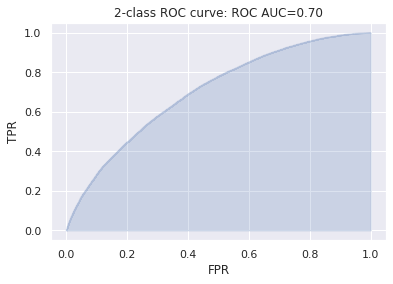

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.step(fpr, tpr, color='b', alpha=0.2,
         where='post')
plt.fill_between(fpr, tpr, alpha=0.2, color='b')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('2-class ROC curve: ROC AUC={0:0.2f}'.format(
          roc_auc_score(y_test, y_prob)))

'2-class ROC curve: ROC AUC=0.70'

------

## Build a random forest model
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.6391740046458863


### Q4.6 What is an optimal depth and number of trees?

In [130]:
# from tqdm import notebook

In [131]:
param_grid = {'max_depth': range(2, 16), 'n_estimators': [10, 20, 50, 100, 200]}
grid_forest = GridSearchCV(estimator=model, param_grid=param_grid)
grid_forest.fit(X_train, y_train)
print('best score is:', grid_forest.best_score_)
print('best depth and estimators is:',grid_forest.best_estimator_.max_depth, grid_forest.best_estimator_.n_estimators)

best score is: 0.6910002532286654
best depth and estimators is: 15 100


ANSW: 15,100

### Q4.7 What is the accuracy for this params?

In [132]:
model = RandomForestClassifier(n_estimators=grid_forest.best_estimator_.n_estimators, max_depth=grid_forest.best_estimator_.max_depth, random_state=42) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.6911566095834909


ANSW: 0.691

### Q4.8 Build precision-recall curve. What is the precision for recall 0.5?

In [133]:
from sklearn.metrics import precision_score, recall_score


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.45')

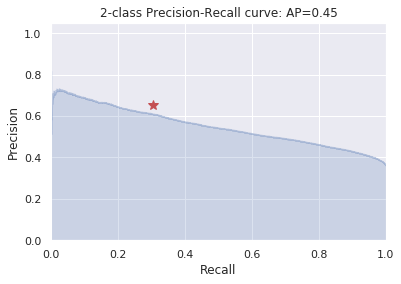

In [134]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2, where='post')

plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_score(y_test, y_pred)))

In [216]:
precision[(recall >= 0.4999812853239) & (recall <= 0.500001199)]

array([0.54203863, 0.54206063, 0.54208262])

ANSW: 0.542

### Q4.9 What is the two most important features by random forest?

In [136]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), X_train.columns), 
             reverse=True))

Features sorted by their score:
[(0.3086, 'goal'), (0.1572, 'duration_days'), (0.0988, 'name_length'), (0.0876, 'year'), (0.0349, 'category_Tabletop Games'), (0.0346, 'main_category_Music'), (0.0253, 'main_category_Theater'), (0.0246, 'main_category_Technology'), (0.0187, 'main_category_Comics'), (0.0157, 'category_Shorts'), (0.0129, 'category_Apps'), (0.0122, 'category_Indie Rock'), (0.0107, 'category_other'), (0.0107, 'category_Theater'), (0.0098, 'main_category_Fashion'), (0.0083, 'category_Web'), (0.0082, 'main_category_Dance'), (0.0077, 'category_Video Games'), (0.0068, 'main_category_Food'), (0.0063, 'currency_USD'), (0.0059, 'main_category_Publishing'), (0.0058, 'currency_EUR'), (0.0044, 'category_Fiction'), (0.0043, 'category_Dance'), (0.0041, 'category_Apparel'), (0.0039, 'main_category_Games'), (0.0038, 'main_category_Crafts'), (0.0037, 'region_America'), (0.0037, 'currency_GBP'), (0.0037, 'category_Comic Books'), (0.0035, 'category_Music'), (0.0034, 'main_category_Film & Vid

ANSW: goal, duration_days

------

# Build the stronger model

### Q5.1 Generate two (or more) meaningfull features

In [137]:
df_xgboost['pledge2goal'] = df_xgboost['usd_pledged_real']/df_xgboost['goal']
q_low = df_xgboost['pledge2goal'].quantile(0.25)
q_hi  = df_xgboost['pledge2goal'].quantile(0.75)
iqr = q_hi - q_low

q_low = q_low - 1.5*iqr
q_hi = q_hi + 1.5*iqr
df_xg_f = df_xgboost[(df_xgboost['pledge2goal'] >= q_low) & (df_xgboost['pledge2goal'] <= q_hi)]
df_xg_f = df_xg_f.drop(['pledged', 'usd pledged', 'usd_pledged_real', 'backers'], axis=1)
df_xg_f = df_xg_f.drop(['pledge2goal', 'name', 'deadline', 'launched', 'country', 'usd_goal_real'], axis=1)
df_xg_f

,category,main_category,currency,goal,state,year,duration_days,region,name_length
ID,,,,,,,,,
1000002330,other,Publishing,GBP,1000.0,0,2015,58,Europe,31
1000003930,other,Film & Video,USD,30000.0,0,2017,59,America,45
1000004038,other,Film & Video,USD,45000.0,0,2013,44,America,14
1000007540,Music,Music,USD,5000.0,0,2012,29,America,49
1000011046,Film & Video,Film & Video,USD,19500.0,0,2015,55,America,58
...,...,...,...,...,...,...,...,...,...
999976400,Documentary,Film & Video,USD,50000.0,0,2014,29,America,49
999977640,other,Film & Video,USD,1500.0,0,2011,26,America,9
999986353,other,Film & Video,USD,15000.0,0,2010,45,America,71


In [138]:
obj_features = ['category', 'main_category', 'currency', 'region']

In [139]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(df_xg_f[['category', 'main_category', 'currency', 'region']]))

In [140]:
category_cols = [f'category_{cat}' for cat in ohe.categories_[0]]
main_category_cols = [f'main_category_{cat}' for cat in ohe.categories_[1]]
currency_cols = [f'currency_{cat}' for cat in ohe.categories_[2]]
region_cols = [f'region_{cat}' for cat in ohe.categories_[3]]
dummy_cols_names = [*category_cols, *main_category_cols, *currency_cols, *region_cols]
encoded_features.columns = dummy_cols_names
encoded_features.index = df_xg_f.index

In [141]:
df_xg_f.drop(['category', 'main_category', 'currency', 'region'], axis=1, inplace=True)
df_xg_f = pd.concat([df_xg_f, encoded_features], axis=1)

In [142]:
df_xg_f

,goal,state,year,duration_days,name_length,category_Accessories,category_Apparel,category_Apps,category_Art,category_Children's Books,...,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,region_America,region_Asia,region_Europe,region_Oceania
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,1000.0,0,2015,58,31,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1000003930,30000.0,0,2017,59,45,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1000004038,45000.0,0,2013,44,14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1000007540,5000.0,0,2012,29,49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1000011046,19500.0,0,2015,55,58,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,50000.0,0,2014,29,49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
999977640,1500.0,0,2011,26,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
999986353,15000.0,0,2010,45,71,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [143]:
df_xg_f['duration_days/goal'] = df_xg_f['duration_days']/df_xg_f['goal']
from sklearn.model_selection import train_test_split
num_feat = ['goal', 'year', 'duration_days', 'name_length', 'duration_days/goal']
X = df_xg_f[[*num_feat, *category_cols, *main_category_cols, *currency_cols, *region_cols]]
y = df_xg_f['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_test.shape

((281443, 83), (70361,))

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_feat])

X_train[num_feat] = scaler.transform(X_train[num_feat])
X_test[num_feat] = scaler.transform(X_test[num_feat])

/home/rkozak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/rkozak/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/rkozak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

### Q5.2 Train an xgboost, that's beat random forest

In [145]:
from xgboost import XGBClassifier as XGBC
xgb = XGBC(max_depth = 8, n_estimators = 200)

In [146]:
%%time
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

CPU times: user 3min 17s, sys: 2.13 s, total: 3min 19s
Wall time: 50.7 s


0.7161353590767613

ANSW: 0.7161353590767613